Metrics loaded: (9, 10)


,TP,FP,TN,FN,Accuracy,Precision,Recall,F1,threshold,model
0,25,5,10,0,0.875,0.833333,1.00,0.909091,25,Model 0
1,25,1,14,0,0.975,0.961538,1.00,0.980392,30,Model 0
2,20,0,15,5,0.875,1.000000,0.80,0.888889,40,Model 0
3,24,0,15,1,0.975,1.000000,0.96,0.979592,25,Model 1
4,20,0,15,5,0.875,1.000000,0.80,0.888889,30,Model 1



After grouping / removing duplicates:


,model,threshold,TP,FP,TN,FN,Accuracy,Precision,Recall,F1
0,Model 0,25,25.0,5.0,10.0,0.0,0.875,0.833333,1.00,0.909091
1,Model 0,30,25.0,1.0,14.0,0.0,0.975,0.961538,1.00,0.980392
2,Model 0,40,20.0,0.0,15.0,5.0,0.875,1.000000,0.80,0.888889
3,Model 1,25,24.0,0.0,15.0,1.0,0.975,1.000000,0.96,0.979592
4,Model 1,30,20.0,0.0,15.0,5.0,0.875,1.000000,0.80,0.888889
5,Model 1,40,12.0,0.0,15.0,13.0,0.675,1.000000,0.48,0.648649
6,Model 2,25,25.0,1.0,14.0,0.0,0.975,0.961538,1.00,0.980392
7,Model 2,30,25.0,0.0,15.0,0.0,1.000,1.000000,1.00,1.000000
8,Model 2,40,16.0,0.0,15.0,9.0,0.775,1.000000,0.64,0.780488


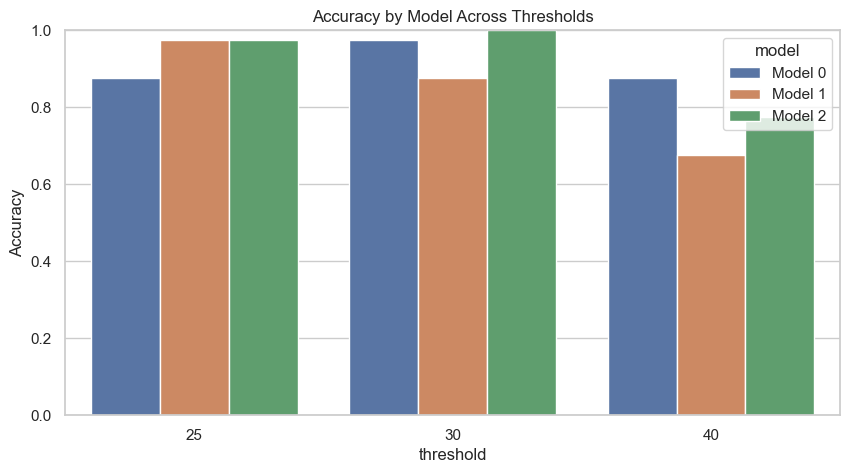

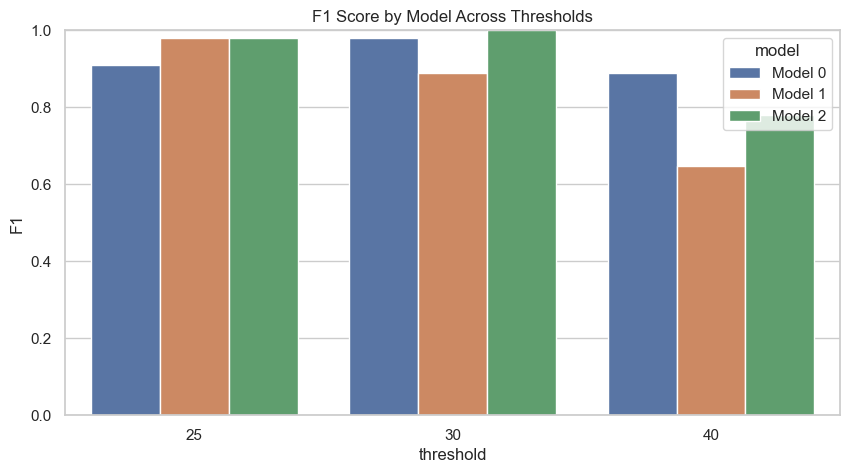

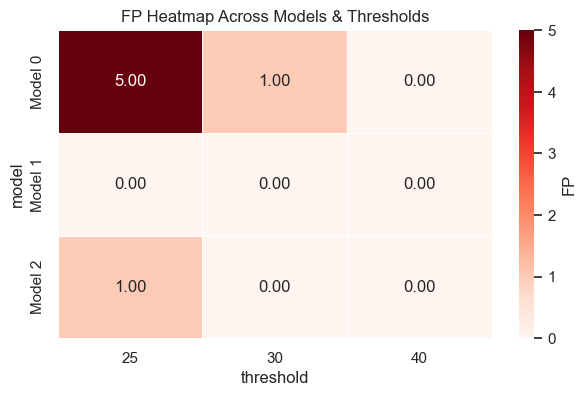

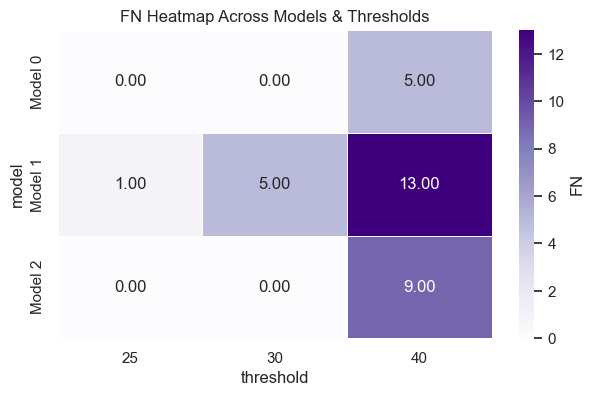

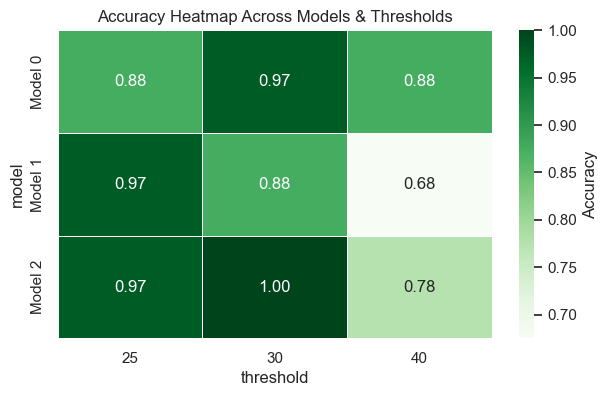

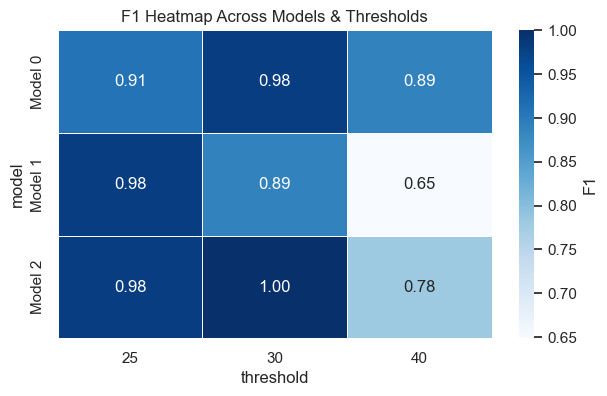

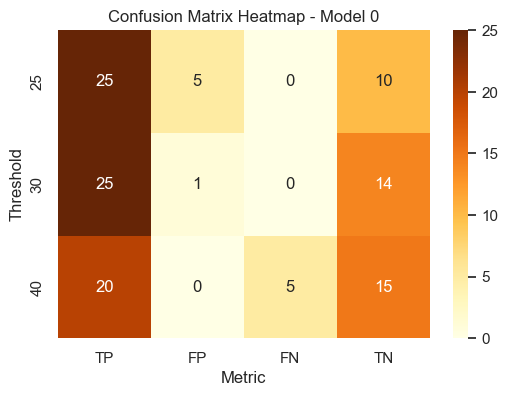

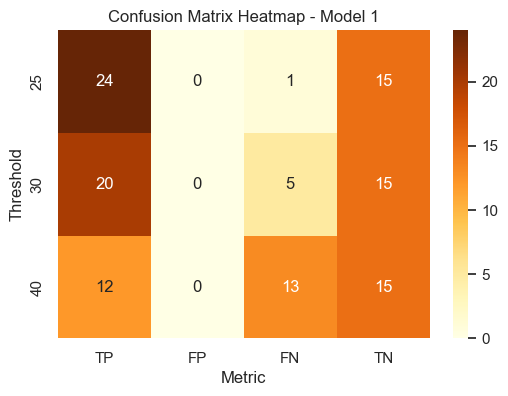

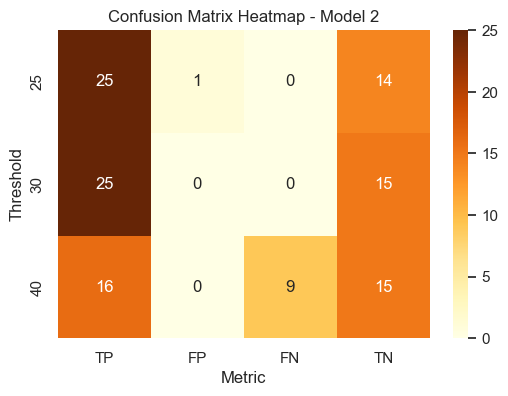

In [1]:
# 09_summary_plots.ipynb

import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

sns.set(style="whitegrid")

# -----------------------------------------------------------
# LOAD METRICS FROM ALL MODELS
# -----------------------------------------------------------
m0 = pd.read_csv("../results/validation/model0_metrics.csv")
m1 = pd.read_csv("../results/validation/model1_metrics.csv")
m2 = pd.read_csv("../results/validation/model2_metrics.csv")

m0["model"] = "Model 0"
m1["model"] = "Model 1"
m2["model"] = "Model 2"

# harmonize column name for threshold
for df in (m0, m1, m2):
    if "T" in df.columns:
        df["threshold"] = df["T"]
        df.drop(columns=["T"], inplace=True)

# combine
df = pd.concat([m0, m1, m2], ignore_index=True)

print("Metrics loaded:", df.shape)
display(df.head())

# -----------------------------------------------------------
# FIX DUPLICATES (take mean if any duplicates exist)
# -----------------------------------------------------------
df = df.groupby(["model", "threshold"], as_index=False).mean()

print("\nAfter grouping / removing duplicates:")
display(df)

# -----------------------------------------------------------
# 1) BAR PLOTS FOR ACCURACY & F1
# -----------------------------------------------------------

plt.figure(figsize=(10,5))
sns.barplot(data=df, x="threshold", y="Accuracy", hue="model")
plt.title("Accuracy by Model Across Thresholds")
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=df, x="threshold", y="F1", hue="model")
plt.title("F1 Score by Model Across Thresholds")
plt.ylim(0,1)
plt.show()

# -----------------------------------------------------------
# HEATMAP FUNCTION
# -----------------------------------------------------------

def plot_heatmap(metric, cmap="Blues"):
    """
    metric = string column name ("FP","FN","Accuracy","F1", etc.)
    """
    pivot = df.pivot_table(index="model", columns="threshold", values=metric, aggfunc="mean")

    plt.figure(figsize=(7,4))
    sns.heatmap(
        pivot,
        annot=True, fmt=".2f",
        cmap=cmap,
        linewidths=.5,
        cbar_kws={'label': metric}
    )
    plt.title(f"{metric} Heatmap Across Models & Thresholds")
    plt.show()

# -----------------------------------------------------------
# 2) HEATMAPS FOR FP, FN, ACCURACY, F1
# -----------------------------------------------------------

plot_heatmap("FP", cmap="Reds")
plot_heatmap("FN", cmap="Purples")
plot_heatmap("Accuracy", cmap="Greens")
plot_heatmap("F1", cmap="Blues")

# -----------------------------------------------------------
# 3) CONFUSION MATRIX HEATMAPS FOR EACH MODEL
# -----------------------------------------------------------

for model in df["model"].unique():
    sub = df[df["model"] == model].set_index("threshold")[["TP","FP","FN","TN"]]

    plt.figure(figsize=(6,4))
    sns.heatmap(sub, annot=True, fmt=".0f", cmap="YlOrBr")
    plt.title(f"Confusion Matrix Heatmap - {model}")
    plt.ylabel("Threshold")
    plt.xlabel("Metric")
    plt.show()
